In [1]:
import numpy as np
import scipy.linalg
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
from general_graph_utils import *

# Graph example 1

In [73]:
# create directed graph
G_ex1 = nx.DiGraph()
G_ex1.add_nodes_from([1,2,3,4,5])
G_ex1.add_edges_from([(1,2),(2,1),(2,4),(4,2),(2,3),(3,2),(3,4),(4,3),(1,4),(4,1),(5,2),(5,1),(2,5),(1,5)])

In [74]:
# create undirected graph
G_ud1 = nx.Graph()
G_ud1.add_nodes_from([1,2,3,4,5])
G_ud1.add_edges_from([(1,2),(2,1),(2,4),(4,2),(2,3),(3,2),(3,4),(4,3),(1,4),(4,1),(5,2),(5,1),(2,5),(1,5)])

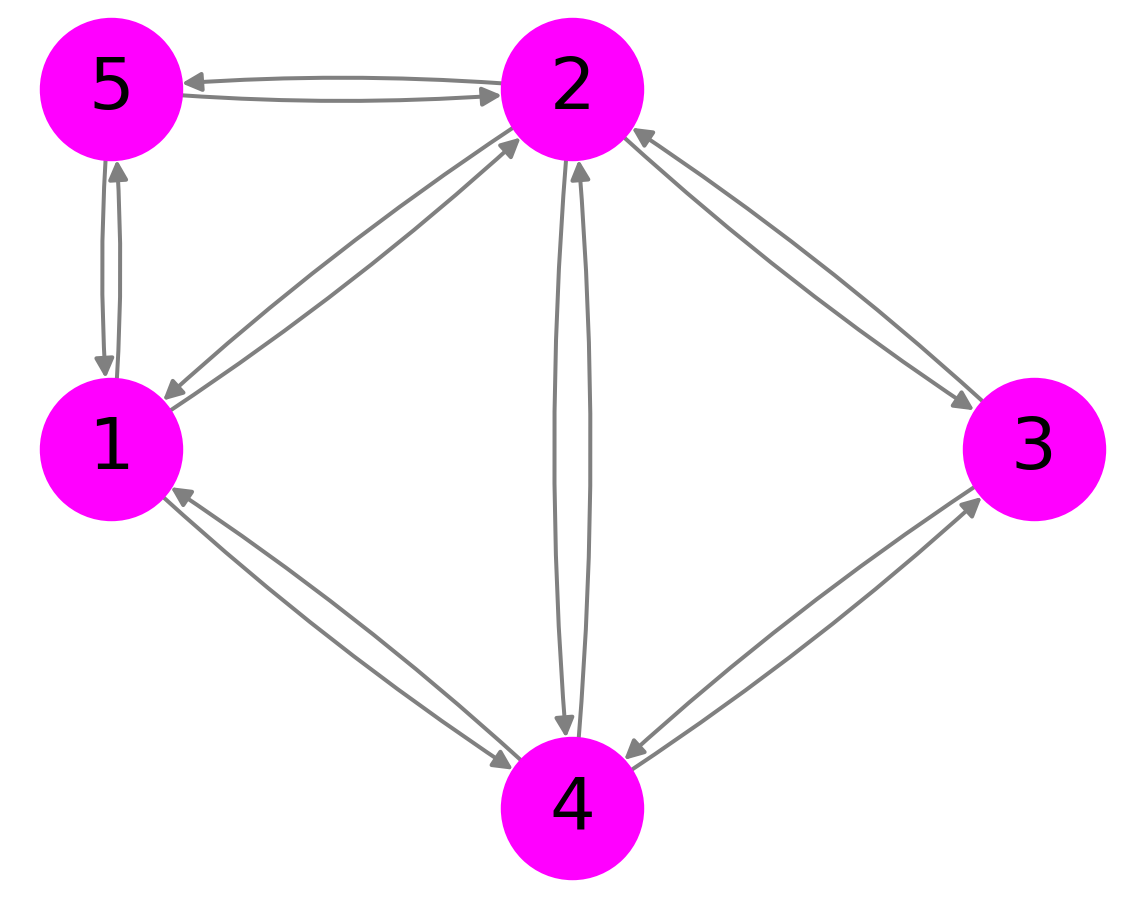

In [75]:
# plot directed graph

plt.rc("figure",figsize=(10,8))

pos = {1: (-1, 3), 2:(0.5, 6), 3: (2, 3), 4: (0.5, 0), 5: (-1,6)}

options = {
    "with_labels": True,
    "font_size": 36,
    "node_size": 5000,
    "node_color": "magenta",
    "edge_color": "grey",
    "arrowsize": 20,
    'width': 2,
    "connectionstyle": 'arc3, rad = 0.05'
}

fig, ax = plt.subplots()
nx.draw_networkx(G_ex1, pos, **options)

ax.set_facecolor('white')
ax.axis('off')
fig.set_facecolor('white')
plt.show()
fig.savefig('G_ex1_diagram.png')

In [100]:
# create a list of the nodes in G_1

node_list = get_nodes(G_ex1)
node_list

array([1, 2, 3, 4, 5])

In [101]:
# create a list of the edges in G_1

edge_list = get_edges(G_ex1)
edge_list

array([[1, 2],
       [1, 4],
       [1, 5],
       [2, 1],
       [2, 4],
       [2, 3],
       [2, 5],
       [3, 2],
       [3, 4],
       [4, 2],
       [4, 3],
       [4, 1],
       [5, 2],
       [5, 1]])

In [102]:
# randomly assign weights to the edges in G_1 and compile the information in a list and a dictionary

weight_dict, weight_list = get_weights(G_ex1,max_val=10)

In [103]:
weight_dict

{(1, 2): 8,
 (1, 4): 2,
 (1, 5): 3,
 (2, 1): 1,
 (2, 4): 1,
 (2, 3): 6,
 (2, 5): 5,
 (3, 2): 6,
 (3, 4): 2,
 (4, 2): 2,
 (4, 3): 8,
 (4, 1): 6,
 (5, 2): 9,
 (5, 1): 2}

In [104]:
weight_list

array([8., 2., 3., 1., 1., 6., 5., 6., 2., 2., 8., 6., 9., 2.])

In [105]:
# obtain a list of lists, where each element of the main list is a list of the nodes involved in a given cycle in G_1
cycle_list = get_cycle_nodes(G_ud1)

In [106]:
cycle_list

[[1, 2, 4], [1, 2, 5], [2, 3, 4]]

In [107]:
# obtain numerical parameters for the graph (number of cycles, nodes, and edges)

num_cycles = len(cycle_list)
num_nodes = len(node_list)
num_edges = len(edge_list)

In [108]:
# initialize autocorrelation parameters

N = 2500
all_affinities = np.zeros((N,num_cycles))
all_areas = np.zeros((N,1))

observable_ex1 = [3, 5, 7, 9, 11]
tau_n = np.around(np.arange(0.01,2.0,step=.01), decimals = 2)

print(all_affinities)
print(all_areas)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [109]:
# partition the cycle information into the edges and weights involved in forward and backward transitions
cycle_edges_forward, cycle_edges_backward, cycle_weights_forward, cycle_weights_backward = get_cycle_weights_edges(G_ud1,cycle_list,weight_dict)

In [110]:
print(cycle_weights_forward)
print(cycle_weights_backward)
print(cycle_edges_forward)
print(cycle_edges_backward)

[[8, 1, 6], [8, 5, 2], [6, 2, 2]]
[[1, 2, 2], [1, 9, 3], [6, 8, 1]]
[[(1, 2), (2, 4), (4, 1)], [(1, 2), (2, 5), (5, 1)], [(2, 3), (3, 4), (4, 2)]]
[[(2, 1), (4, 2), (1, 4)], [(2, 1), (5, 2), (1, 5)], [(3, 2), (4, 3), (2, 4)]]


In [111]:
weight_dict

{(1, 2): 8,
 (1, 4): 2,
 (1, 5): 3,
 (2, 1): 1,
 (2, 4): 1,
 (2, 3): 6,
 (2, 5): 5,
 (3, 2): 6,
 (3, 4): 2,
 (4, 2): 2,
 (4, 3): 8,
 (4, 1): 6,
 (5, 2): 9,
 (5, 1): 2}

In [112]:
# set each cycle such that it is at thermodynamic equilibrium

num_cycles = len(cycle_list)
edge_tracker = []

# edge (2,5)
cycle_weights_forward[1][1] = (np.prod(cycle_weights_backward[1]))/((cycle_weights_forward[1][0]*cycle_weights_forward[1][2]))
edge_tracker.append(cycle_edges_forward[1][1])

# edge (4,1)
cycle_weights_forward[0][2] = (np.prod(cycle_weights_backward[0]))/((cycle_weights_forward[0][0]*cycle_weights_forward[0][1]))
edge_tracker.append(cycle_edges_forward[0][2])

# edge (2,3)
cycle_weights_forward[2][0] = (np.prod(cycle_weights_backward[2]))/((cycle_weights_forward[2][1]*cycle_weights_forward[2][2]))
edge_tracker.append(cycle_edges_forward[2][0])

In [113]:
edge_tracker

[(2, 5), (4, 1), (2, 3)]

In [114]:
# check that the affinity of each cycle is 0
products_f, products_b = calculate_cycle_products(cycle_weights_forward,cycle_weights_backward)
total_affinities = calculate_affinities(products_f, products_b, cycle_list)
print(total_affinities)

[0. 0. 0.]


In [115]:
all_affinities[0] = total_affinities
#print(all_affinities)

In [116]:
# change weight_dict so it has the equilibrium parameter values
for i in range(num_cycles):
    weight_dict[edge_tracker[i]] = cycle_weights_forward[i][0]

#weight_dict = dict.fromkeys(weight_dict.keys(), 1)
#print(weight_dict)

In [117]:
weight_list = np.fromiter(weight_dict.values(), dtype=float)
print(weight_list)

[ 8.  2.  3.  1.  1. 12.  8.  6.  2.  2.  8.  8.  9.  2.]


In [118]:
# calculate the Laplacian
L = Laplacian_all(edge_list,weight_list,num_nodes,num_edges)
print(L)

[[-11.   8.   0.   2.   3.]
 [  1. -25.  12.   1.   8.]
 [  0.   6. -20.   2.   0.]
 [  8.   2.   8.  -5.   0.]
 [  2.   9.   0.   0. -11.]]


In [119]:
# calculate the forward and reverse higher order autocorrelation functions
t, t_rev = NG_III_autocorrelation_analytical(observable_ex1,L,tau_n,alpha=1,beta=3)

In [120]:
# why is it not 0?
all_areas[0] = np.abs(np.trapz(t)-np.trapz(t_rev))
print(all_areas[0])

[54.53759022]


In [121]:
# plot formatting
plt.rc("text", usetex=False)
plt.rc("font", family = "serif",size=14)
plt.rc("figure",figsize=(14,12))
%config InlineBackend.figure_format = 'retina'
#plt.style.use('dark_background')
#plt.rcParams.update({"figure.facecolor": "111111",
#                   "savefig.facecolor": "111111"})

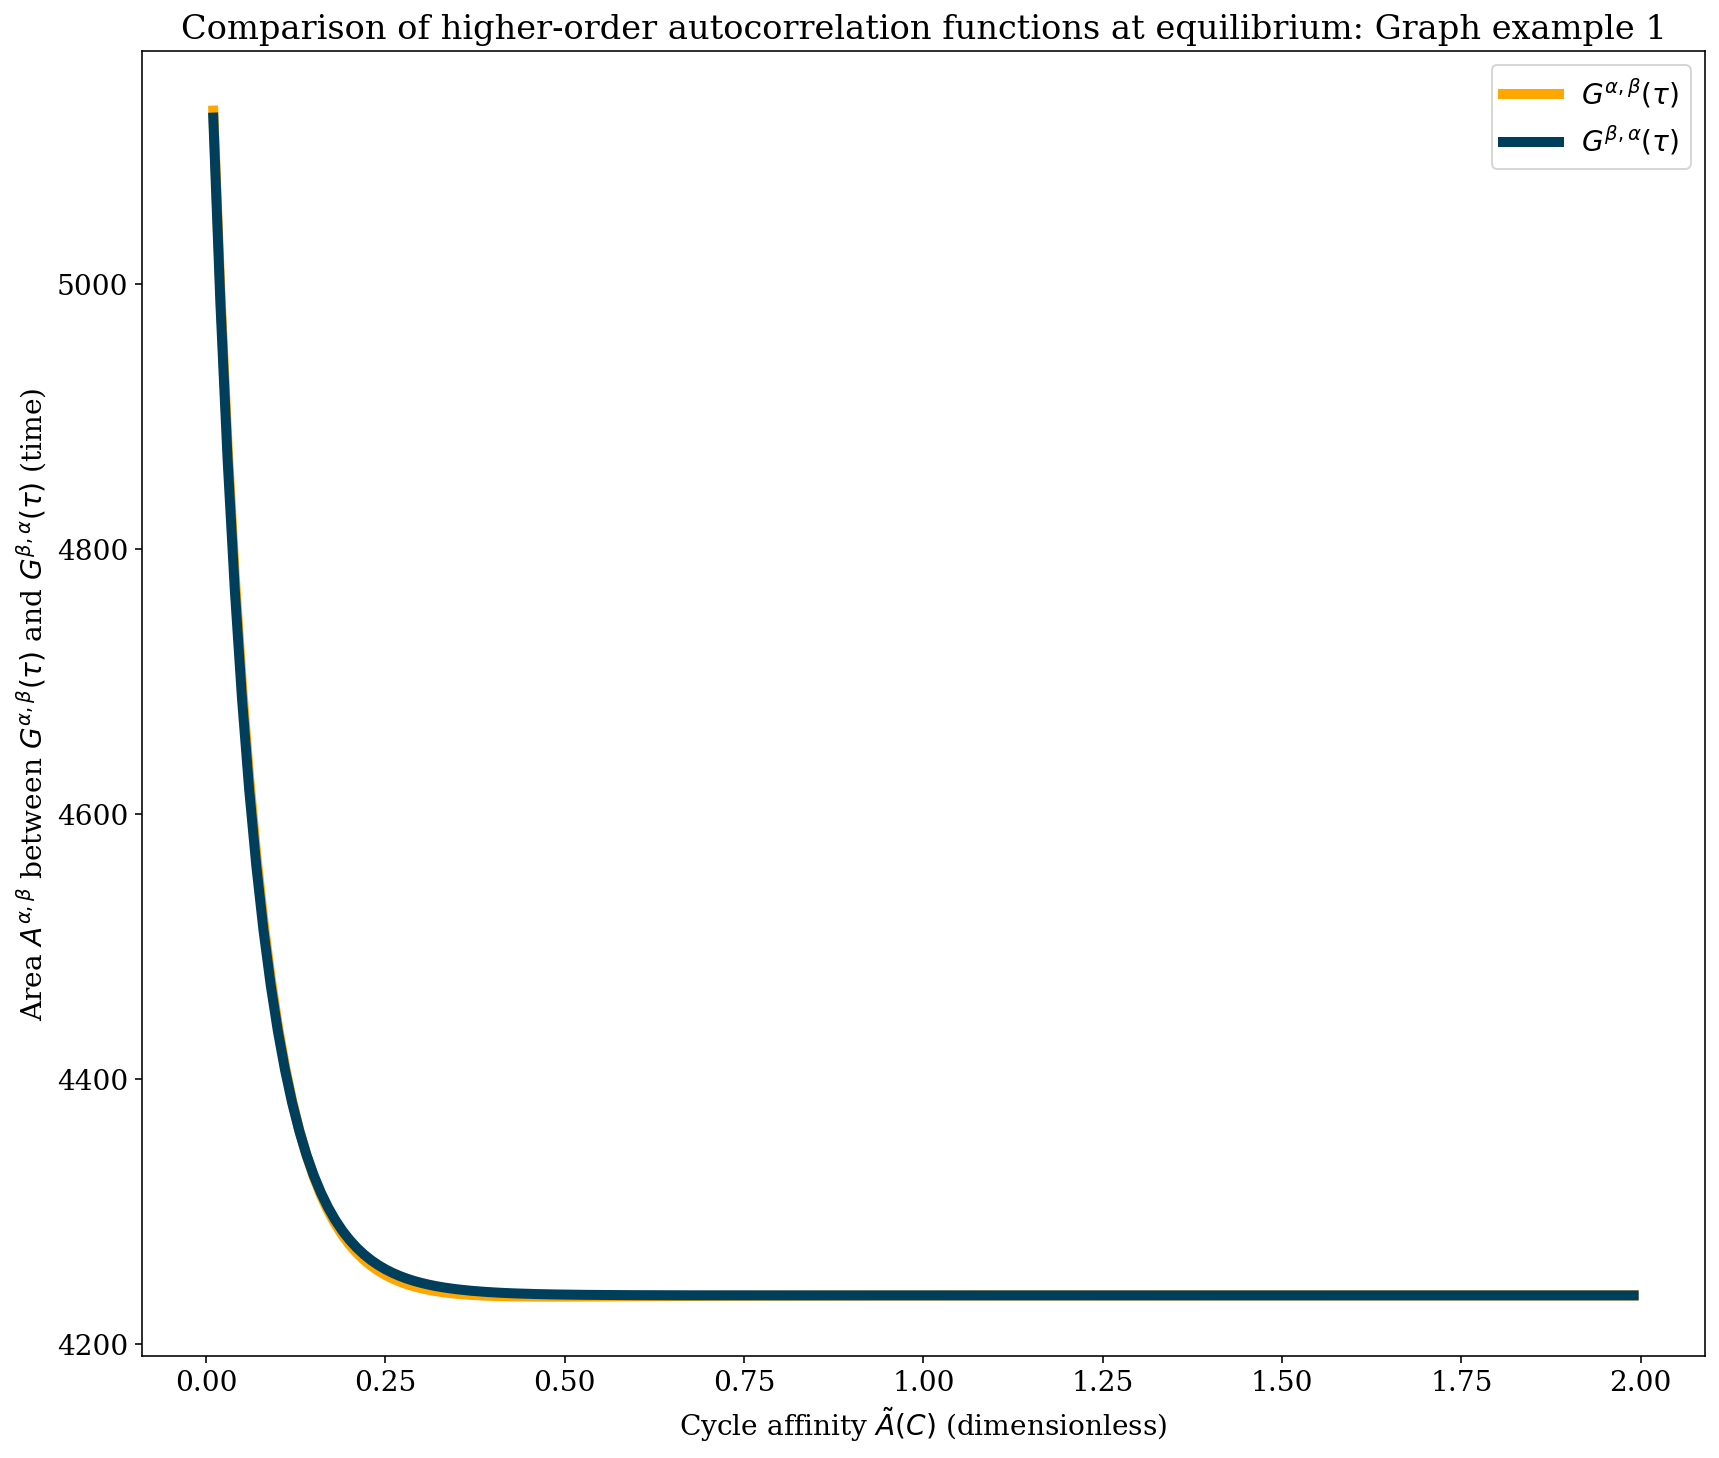

In [122]:
fig, ax = plt.subplots()
plt.plot(tau_n, t, label=r'$G^{\alpha,\beta}(\tau)$',linewidth=5,color='#ffa600')
plt.plot(tau_n, t_rev, label=r'$G^{\beta,\alpha}(\tau)$',linewidth=5, c= '#003f5c')
plt.xlabel(r'Cycle affinity $\tilde{A}(C)$ (dimensionless)')
plt.ylabel(r'Area $A^{\alpha, \beta}$ between $G^{\alpha,\beta}(\tau)$ and $G^{\beta,\alpha}(\tau)$ (time)')
plt.title(r'Comparison of higher-order autocorrelation functions at equilibrium: Graph example 1')
plt.legend()
fig.savefig('G_ex11_equilibrium_A=54.png', dpi = 600, bbox_inches='tight',facecolor=fig.get_facecolor(), edgecolor='none')